<a href="https://colab.research.google.com/github/tivra014/Fake_Real-News_Project/blob/main/Fake_Real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving TurkishNewsArticles.csv to TurkishNewsArticles (2).csv

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       249
           1       0.48      0.50      0.49       234

    accuracy                           0.50       483
   macro avg       0.50      0.50      0.50       483
weighted avg       0.50      0.50      0.50       483

✅ Accuracy Score: 0.4989648033126294


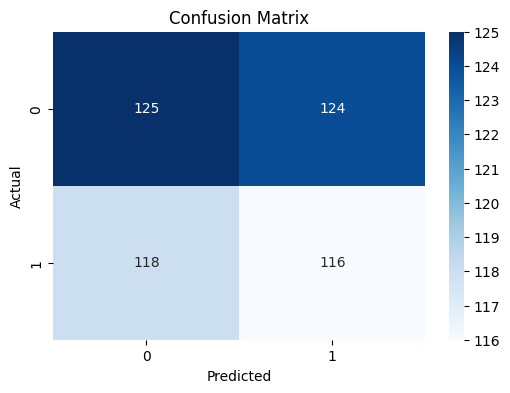

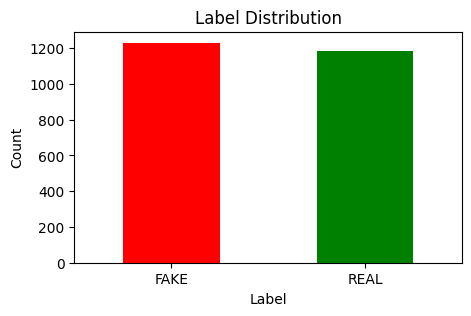


 Try custom prediction:
Input: Türkiye yeni bir ekonomik plan hazırladı.
Prediction:  REAL


In [2]:
#  1. Import Libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#  2. Upload CSV file
from google.colab import files
uploaded = files.upload()  # Upload your "TurkishNewsArticles.csv"

#  3. Load Data
df = pd.read_csv("TurkishNewsArticles.csv")

#  4. Simulate Labels (FAKE=0, REAL=1)
np.random.seed(42)
df['label'] = np.random.choice([0, 1], size=len(df))

#  5. Custom Turkish Stopwords
turkish_stopwords = set([
    've', 'bir', 'bu', 'da', 'ne', 'için', 'ile', 'gibi', 'de', 'mi', 'di', 'ki',
    'ben', 'sen', 'o', 'biz', 'siz', 'onlar', 'ama', 'fakat', 'çünkü', 'çok',
    'az', 'daha', 'en', 'her', 'hiç', 'ya', 'ya da', 'hem', 'hem de'
])

#  6. Text Cleaning
def clean_text(text):
    text = str(text).lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    words = text.split()
    return ' '.join([word for word in words if word not in turkish_stopwords])

df['clean_text'] = df['text'].apply(clean_text)

# 📌 7. TF-IDF + Split Data
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

#  8. Train Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

#  9. Evaluation Metrics
y_pred = model.predict(X_test_vec)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

#  10. Confusion Matrix Chart
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  11. Label Distribution
plt.figure(figsize=(5,3))
df['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xticks([0,1], ['FAKE', 'REAL'], rotation=0)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

#  12. Predict Custom News
def predict_news(text):
    cleaned = clean_text(text)
    vec = tfidf.transform([cleaned])
    result = model.predict(vec)[0]
    return "REAL" if result == 1 else "FAKE"

# ✅ 13. Try Your Own Input
print("\n Try custom prediction:")
sample_text = "Türkiye yeni bir ekonomik plan hazırladı."
print(f"Input: {sample_text}")
print(f"Prediction:  {predict_news(sample_text)}")
